Part (a): Representation of the network in terms of its ‘adjacency matrix’ as well as ‘edge list’.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, deque
from itertools import combinations
# !pip install -q py2cytoscape
# from py2cytoscape.data.cyrest_client import CyRestClient

def load_edge_list(file_path):
    edges = []
    nodes = set()
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('%'):
                continue
            u, v = map(int, line.split(','))
            edges.append((u, v))
            nodes.update([u, v])
    return edges, nodes

def create_adjacency_matrix(edges, nodes):
    node_list = sorted(nodes)
    node_index = {node: idx for idx, node in enumerate(node_list)}
    size = len(nodes)
    adj_matrix = np.zeros((size, size), dtype=int)
    for u, v in edges:
        idx_u = node_index[u]
        idx_v = node_index[v]
        adj_matrix[idx_u][idx_v] = 1
        adj_matrix[idx_v][idx_u] = 1
    return adj_matrix, node_index

file_path = "Q1_Bio_Grid_Mouse.csv"
edges, nodes = load_edge_list(file_path)
print("Number of nodes: ",len(nodes))
print("Number of edges: ",len(edges))
adj_matrix, node_index = create_adjacency_matrix(edges, nodes)

print("Adjacent Matrix:",adj_matrix)
print("Edge List:")
for edge in edges:
    print(edge)

Number of nodes:  1450
Number of edges:  3272
Adjacent Matrix: [[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
Edge List:
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(1, 0)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(0, 20)
(2, 0)
(0, 21)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 0)
(11, 0)
(12, 0)
(1, 28)
(13, 0)
(1, 33)
(14, 0)
(15, 0)
(16, 0)
(1, 64)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(2, 33)
(24, 0)
(25, 0)
(26, 0)
(2, 64)
(27, 0)
(28, 1)
(28, 4)
(28, 6)
(28, 8)
(28, 9)
(0, 304)
(33, 1)
(33, 2)
(33, 4)
(33, 6)
(33, 7)
(33, 9)
(3, 64)
(4, 28)
(4, 33)
(4, 64)
(5, 64)
(6, 28)
(6, 33)
(64, 1)
(64, 2)
(64, 3)
(64, 4)
(64, 5)
(64, 7)
(64, 8)
(7, 33)
(7, 64)
(8, 28)
(8, 64)
(9, 28)
(9, 33)
(10, 28)
(11, 28)
(11, 33)
(1, 147)
(1, 154)
(1, 162)
(11, 64)
(1, 193)
(12, 33)
(12, 64)
(13, 

Part (b): Visualization of network in Cytoscape

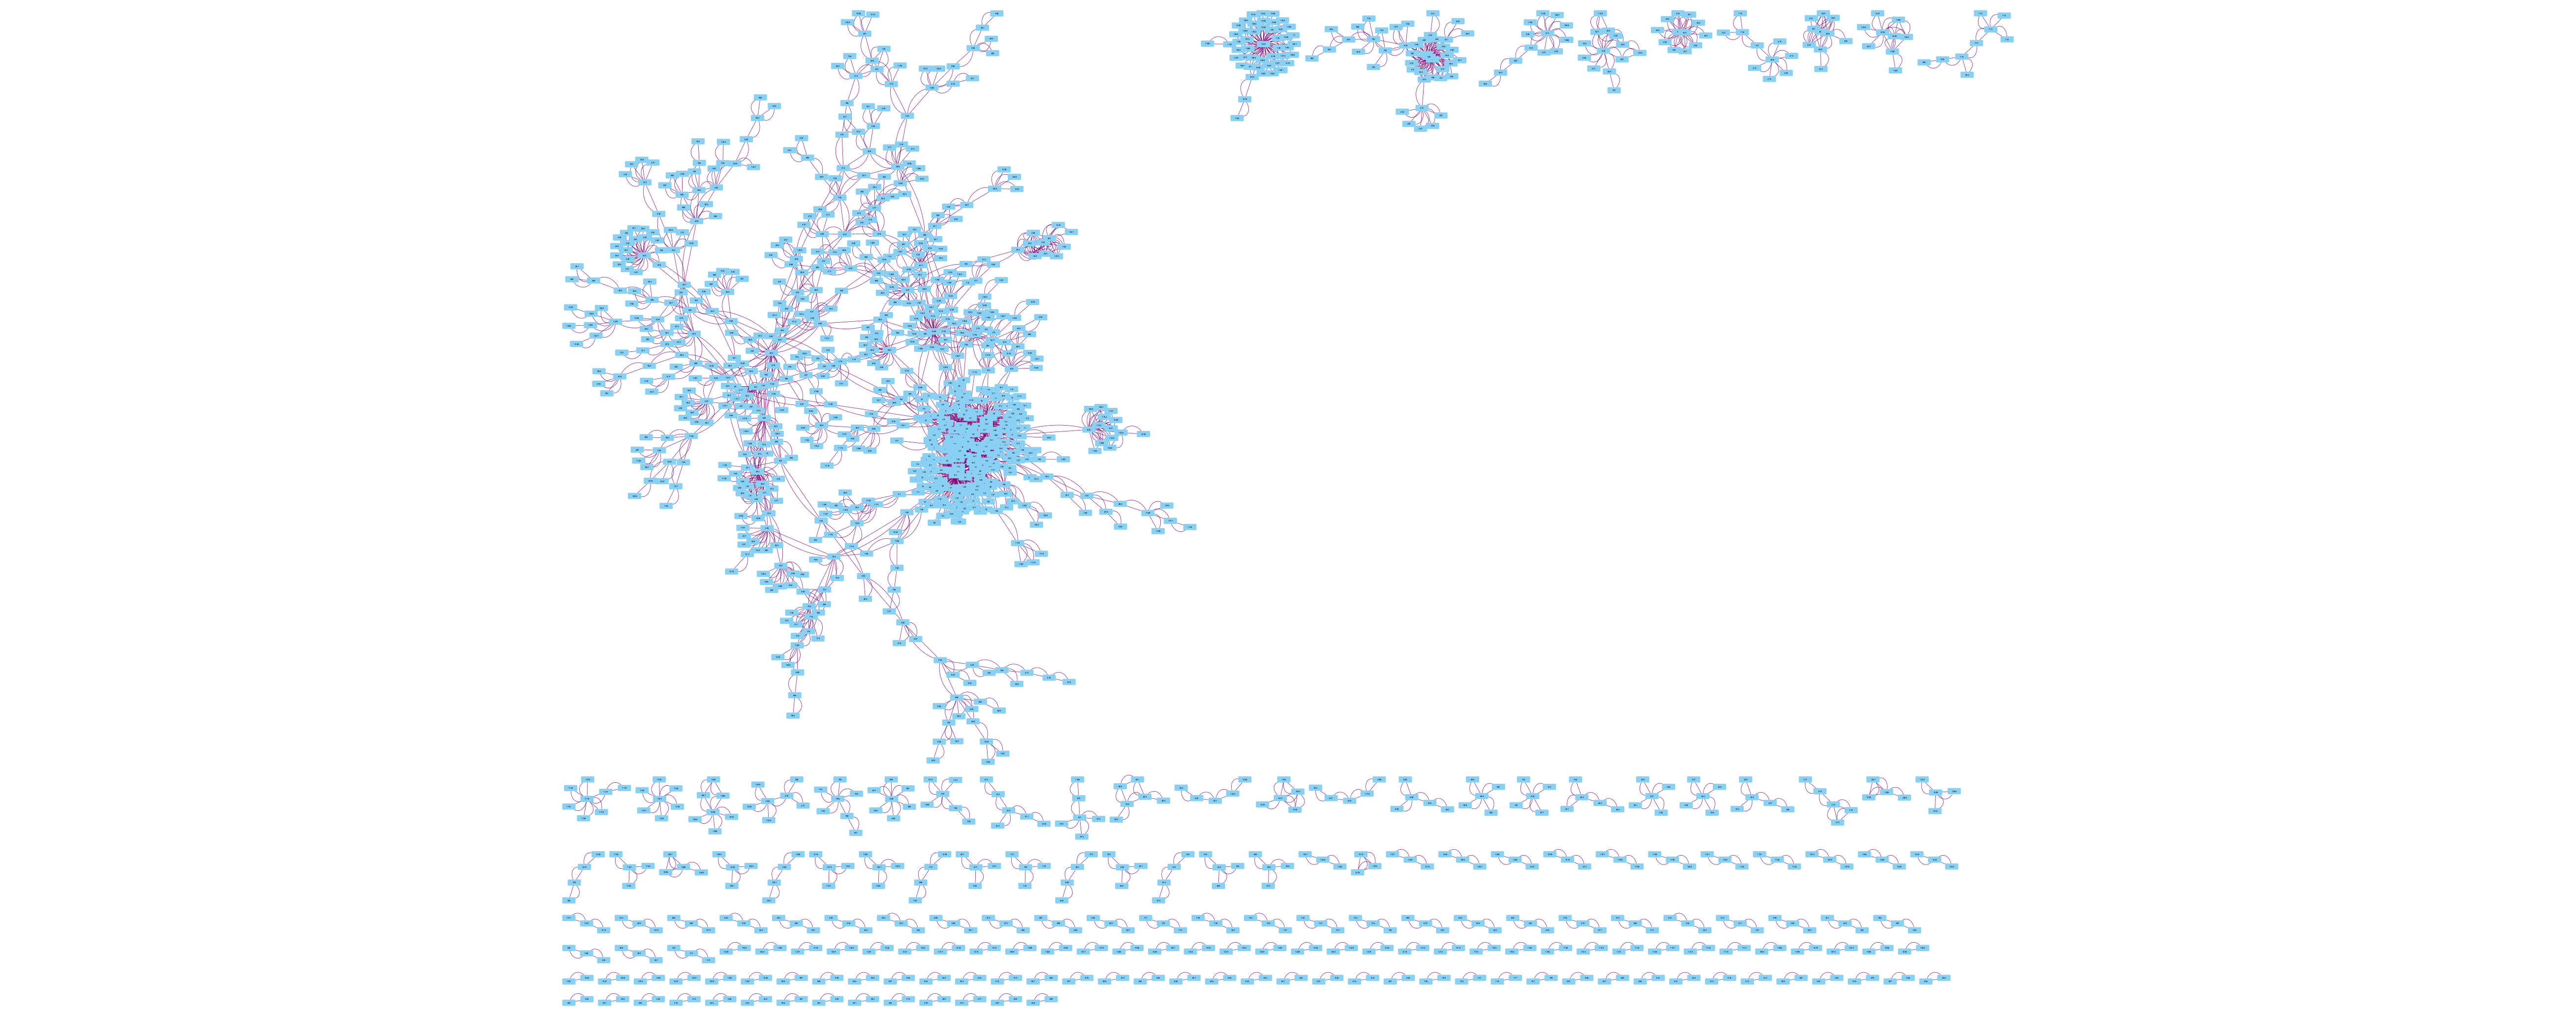

In [10]:
#VISUALIZATIION IS DONE USING CYTOSCAPE AND SAVED AS PNG FILE
from IPython.display import Image
Image(filename='undirected.png')


Party (c): Sparsness of the network

Sparsity refers to the proportion of missing connections relative to the total possible connections in a network. A higher sparsity value indicates that the network has fewer actual connections compared to the maximum possible.

Sparseness = 1 - (actual number of edges)/(Maximum number of possible edges)

Higher Sparseness score: More sparse network

Lower Sparseness score: Dense network

For our network, sparseness score is 0.99844.
 
This indicates that the network is extremely sparse, with only about 0.31% of the possible connections present. Such high sparseness is typical in many real-world networks, including biological networks, where each node is connected to only a small fraction of the total possible nodes


In [11]:
def compute_sparseness(adj_matrix):
    num_nodes = adj_matrix.shape[0]
    num_edges = np.sum(adj_matrix) / 2
    total_possible_edges = num_nodes * (num_nodes - 1) / 2
    sparseness = 1 - (num_edges / total_possible_edges)
    return sparseness

x = len(nodes)*(len(nodes)-1)/2
print("Maximum number of possible edges: ",x)
sparseness = compute_sparseness(adj_matrix)
print(f"Sparseness: {sparseness}")


Maximum number of possible edges:  1050525.0
Sparseness: 0.9984426834201947


Part (d): Average Degree

In [12]:
def compute_average_degree(adj_matrix):
    degrees = np.sum(adj_matrix, axis=1)
    avg_degree = np.mean(degrees)
    return avg_degree, degrees

avg_degree, degrees = compute_average_degree(adj_matrix)
print(f"Average Degree: {avg_degree}")

Average Degree: 2.256551724137931


Part (e): Plot of scaled/normalized degree distribution


Scaled Degree Distribution:


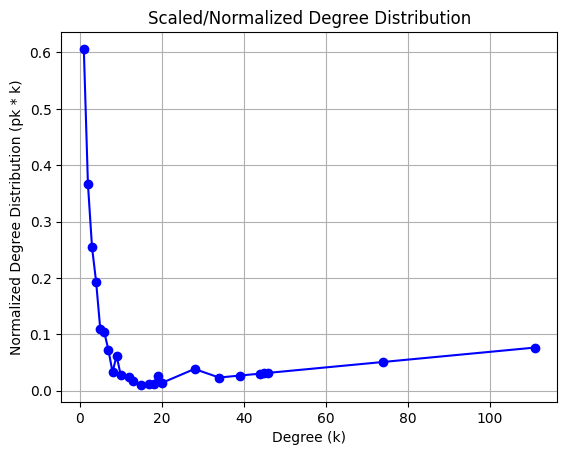

In [13]:
def plot_degree_distribution(degrees, output_file):
    unique, counts = np.unique(degrees, return_counts=True)
    pk = counts / len(degrees)
    plt.figure()
    plt.plot(unique, pk * unique, 'bo-')
    plt.xlabel('Degree (k)')
    plt.ylabel('Normalized Degree Distribution (pk * k)')
    plt.title('Scaled/Normalized Degree Distribution')
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()
    plt.close()

print("\nScaled Degree Distribution:")
plot_degree_distribution(degrees, "degree_distribution.png")

Part (f): Average Path Length (Breadth First Search Algorithm Implementation) and plot of average path length distribution,

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

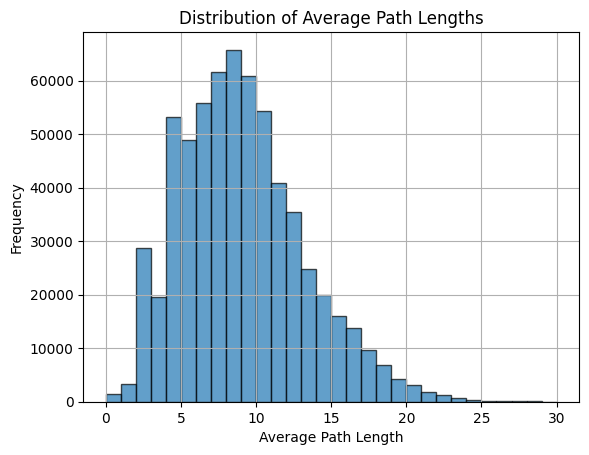

In [14]:
def bfs_shortest_path_lengths(adj_list, start_node):
    visited = {start_node: 0}
    queue = deque([start_node])
    while queue:
        node = queue.popleft()
        current_distance = visited[node]
        for neighbor in adj_list[node]:
            if neighbor not in visited:
                visited[neighbor] = current_distance + 1
                queue.append(neighbor)
    return visited

def compute_average_path_length(adj_matrix):
    num_nodes = adj_matrix.shape[0]
    adj_list = defaultdict(list)
    for i in range(num_nodes):
        for j in range(num_nodes):
            if adj_matrix[i, j] == 1:
                adj_list[i].append(j)
    path_lengths = []
    
    for node in range(num_nodes):
        lengths = bfs_shortest_path_lengths(adj_list, node)
        path_lengths.extend(lengths.values())
    avg_path_length = np.mean(path_lengths)
    print(path_lengths)
    return avg_path_length, path_lengths

def plot_average_path_length_distribution(avg_path_lengths, output_file):
    plt.figure()
    plt.hist(avg_path_lengths, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Average Path Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Average Path Lengths')
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()
    plt.close()

avg_path_length, lengths = compute_average_path_length(adj_matrix)
print(f"Average Path Length: {avg_path_length}")
plot_average_path_length_distribution(lengths, 'avg_path_length_distribution.png')

Part (g): Average Clustering Coefficient and plot of C(k) × k.

Average Clustering Coefficient: 0.038295109773010906


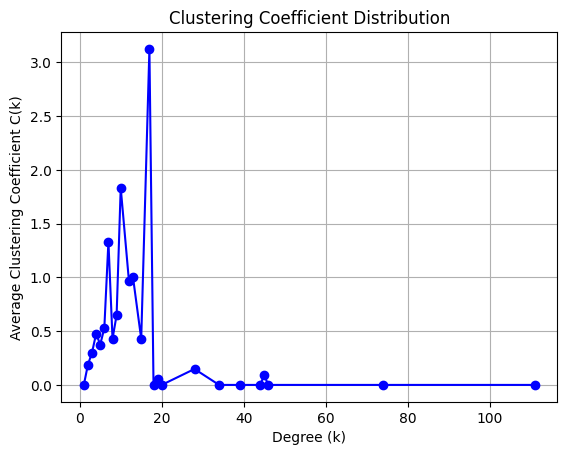

In [15]:
def compute_clustering_coefficient(adj_matrix):
    num_nodes = adj_matrix.shape[0]
    clustering_coeffs = []
    for i in range(num_nodes):
        neighbors = np.where(adj_matrix[i] == 1)[0]
        k = len(neighbors)
        if k < 2:
            clustering_coeffs.append(0.0)
            continue
        links = 0
        for u, v in combinations(neighbors, 2):
            if adj_matrix[u, v] == 1:
                links += 1
        clustering_coeff = (2 * links) / (k * (k - 1))
        clustering_coeffs.append(clustering_coeff)
    avg_clustering_coeff = np.mean(clustering_coeffs)
    return avg_clustering_coeff, clustering_coeffs

def plot_clustering_coefficient_distribution(clustering_coeffs, degrees, output_file):
    unique_degrees = np.unique(degrees)
    avg_clustering_per_degree = []

    for k in unique_degrees:
        indices = np.where(degrees == k)[0]
        avg_clustering = np.mean([clustering_coeffs[i] for i in indices])
        avg_clustering_per_degree.append(avg_clustering)

    scaled_clustering = unique_degrees * np.array(avg_clustering_per_degree)

    plt.figure()
    plt.plot(unique_degrees, scaled_clustering, 'bo-')
    plt.xlabel('Degree (k)')
    plt.ylabel('Average Clustering Coefficient C(k)')
    plt.title('Clustering Coefficient Distribution')
    plt.grid(True)
    plt.savefig(output_file)
    plt.show()
    plt.close()

avg_clustering_coeff, clustering_coeffs = compute_clustering_coefficient(adj_matrix)
print(f"Average Clustering Coefficient: {avg_clustering_coeff}")
plot_clustering_coefficient_distribution(clustering_coeffs, degrees, "clustering_coefficient_distribution.png")